<a href="https://colab.research.google.com/github/gisynw/ssj-376/blob/main/docs/Lectures/Week05/Student_spatial_relationship.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" style="height: 30px;"/>
</a>

<a href="./Lectures/Week05/Student_spatial_relationship.ipynb" target="_blank"> 
  <img src="https://img.icons8.com/?size=100&id=108635&format=png&color=000000" alt="Download" style="height: 40px;"/>
 </a>

<center>
    <h2 style="color: #526cfe ; font-family: Arial, sans-serif; font-size: 32px; padding: 10px;">
        Week 5: Spatial Relationship
    </h2>
</center>

In [3]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import text
import os
import geopandas as gpd

## Add the passworkd to User Variabels for Administrator

- System Properties
- Envrionment Variables
- New
- Variable name: SQL_PASSWORD ; Variable value: *the password for postgresql*

In [4]:
host = 'localhost'
database = 'spatial'
user = os.getenv('SQL_USER')
port = '5432'
password = os.getenv('SQL_PASSWORD')

**Check your passworkd**

print(os.getenv('SQL_PASSWORD'))

In [5]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

In [6]:
engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys', 'us_tract_2020']

## Select Ten Features FROM nyc_neighborhoods

In [7]:
streets = text("SELECT * FROM  ch05.nyc_neighborhoods LIMIT 10")

sub_streetsub_street = gpd.read_postgis(streets, con=engine)

In [8]:
sub_streetsub_street

,gid,boroname,name,geom
0,1,Brooklyn,Bensonhurst,"MULTIPOLYGON (((582771.426 4495167.427, 584651..."
1,2,Manhattan,East Village,"MULTIPOLYGON (((585508.753 4509691.267, 586826..."
2,3,Manhattan,West Village,"MULTIPOLYGON (((583263.278 4509242.626, 583276..."
3,4,The Bronx,Throggs Neck,"MULTIPOLYGON (((597640.009 4520272.72, 597647...."
4,5,The Bronx,Wakefield-Williamsbridge,"MULTIPOLYGON (((595285.205 4525938.798, 595348..."
5,6,Queens,Auburndale,"MULTIPOLYGON (((600973.009 4510338.857, 601002..."
6,7,Manhattan,Battery Park,"MULTIPOLYGON (((583408.101 4508093.111, 583356..."
7,8,Manhattan,Carnegie Hill,"MULTIPOLYGON (((588501.208 4515525.88, 588125...."
8,9,Staten Island,Mariners Harbor,"MULTIPOLYGON (((570300.108 4497031.156, 570393..."
9,10,Staten Island,Rossville,"MULTIPOLYGON (((564664.957 4489358.427, 564771..."


<Axes: >

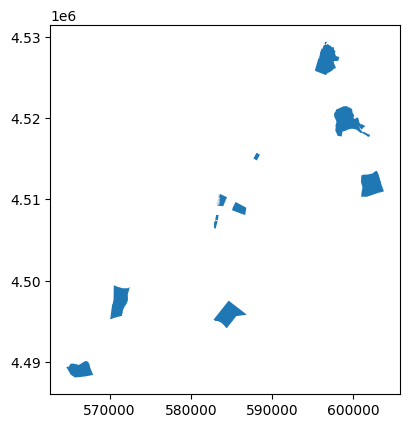

In [9]:
sub_streetsub_street.plot()

## Select All features from nyc_neighborhoods

<Axes: >

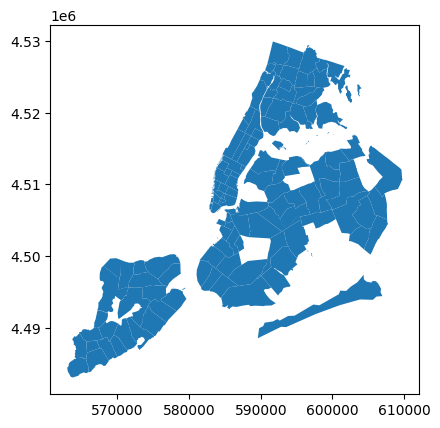

In [10]:
query = text("SELECT * FROM ch05.nyc_neighborhoods")
neighborhood_shp = gpd.read_postgis(query, con=engine)
neighborhood_shp.plot()

## ST_Instersects

Identify all subway stations that intersect with neighborhoods = 'Manhattan'

<Axes: >

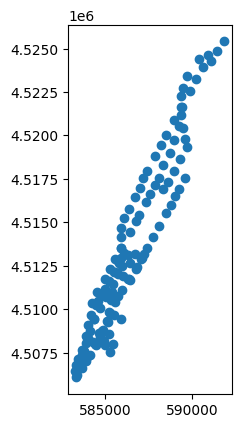

In [11]:
# Write and execute your SQL query
query = text("""SELECT nbh.NAME AS nbh_name, subways.NAME AS subway_name, subways.geom
FROM ch05.nyc_neighborhoods nbh, ch05.nyc_subway_stations subways  
WHERE ST_Intersects(nbh.geom, subways.geom) AND nbh.boroname = 'Manhattan'
                """)

all_nbg = text("SELECT * FROM ch05.nyc_neighborhoods")

sub_subway = gpd.read_postgis(query, con=engine)

sub_subway.plot()


## Plot neighborhoods and Manhattan

C:\Users\yyang\AppData\Local\Temp\ipykernel_19008\3855605619.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


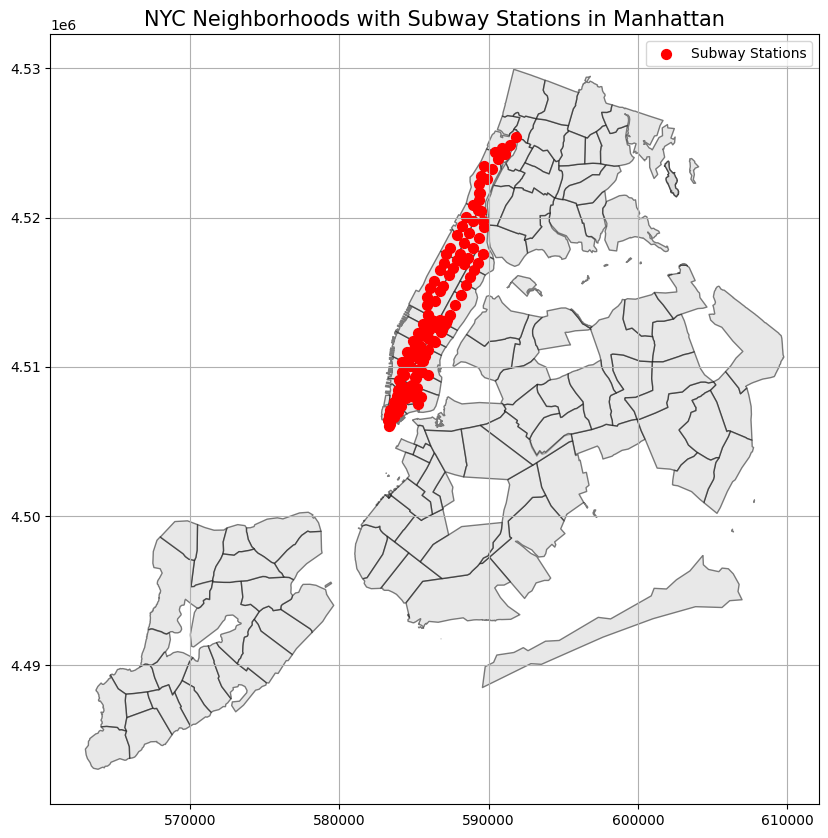

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))

neighborhood_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label='Neighborhoods')

# Plot subway stations in red
sub_subway.plot(ax=ax, color='red', markersize=50, label='Subway Stations')

# Add title, legend, and grid
plt.title('NYC Neighborhoods with Subway Stations in Manhattan', fontsize=15)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Exercise 1: Select subway stations that locate in neighborhoods in 'Queens', 'Brooklyn'

C:\Users\yyang\AppData\Local\Temp\ipykernel_19008\2627626303.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


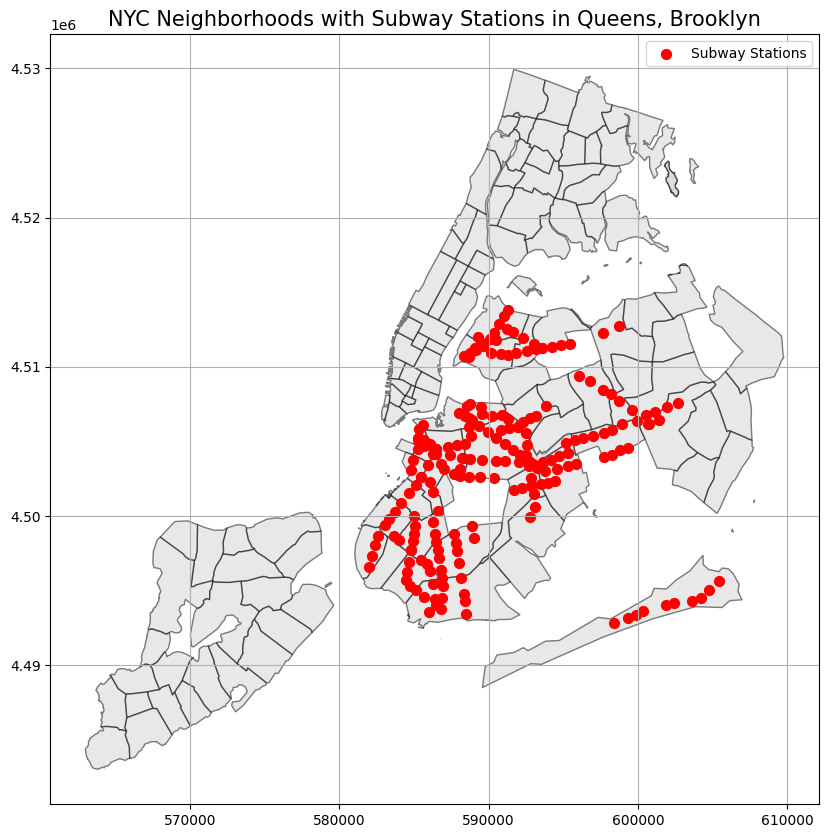

In [16]:
# Write and execute your SQL query
query = text("""SELECT nbh.NAME AS nbh_name, subways.NAME AS subway_name, subways.geom
FROM ch05.nyc_neighborhoods nbh, ch05.nyc_subway_stations subways  
WHERE ST_Intersects(nbh.geom, subways.geom) AND nbh.boroname = 'Queens' OR 
              ST_Intersects(nbh.geom, subways.geom) AND nbh.boroname = 'Brooklyn'
                """)

all_nbg = text("SELECT * FROM ch05.nyc_neighborhoods")

sub_subway = gpd.read_postgis(query, con=engine)

all_neighbors = gpd.read_postgis(all_nbg, con = engine)

## Plot maps

ig, ax = plt.subplots(figsize=(12, 10))

all_neighbors.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label='Neighborhoods')

# Plot subway stations in red
sub_subway.plot(ax=ax, color='red', markersize=50, label='Subway Stations')

# Add title, legend, and grid
plt.title('NYC Neighborhoods with Subway Stations in Queens, Brooklyn', fontsize=15)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



C:\Users\yyang\AppData\Local\Temp\ipykernel_19008\1634607323.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


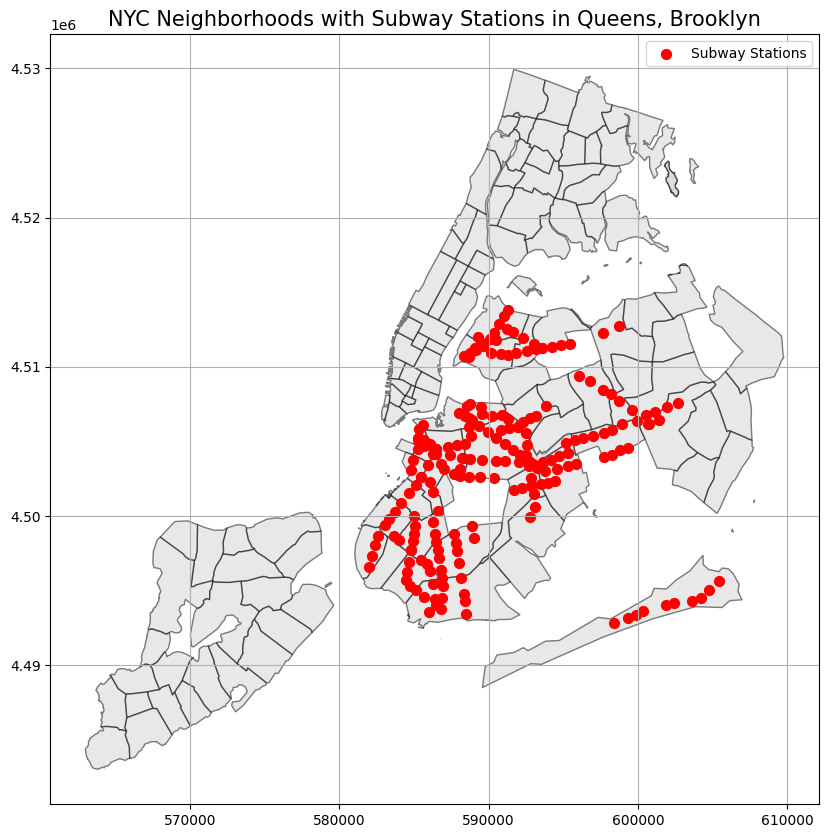

In [17]:
# Write and execute your SQL query
query = text("""SELECT nbh.NAME AS nbh_name, subways.NAME AS subway_name, subways.geom
FROM ch05.nyc_neighborhoods nbh, ch05.nyc_subway_stations subways  
WHERE ST_Intersects(nbh.geom, subways.geom) AND (nbh.boroname = 'Queens' OR nbh.boroname = 'Brooklyn')
                """)

all_nbg = text("SELECT * FROM ch05.nyc_neighborhoods")

sub_subway = gpd.read_postgis(query, con=engine)

all_neighbors = gpd.read_postgis(all_nbg, con = engine)

## Plot maps

ig, ax = plt.subplots(figsize=(12, 10))

all_neighbors.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label='Neighborhoods')

# Plot subway stations in red
sub_subway.plot(ax=ax, color='red', markersize=50, label='Subway Stations')

# Add title, legend, and grid
plt.title('NYC Neighborhoods with Subway Stations in Queens, Brooklyn', fontsize=15)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



C:\Users\yyang\AppData\Local\Temp\ipykernel_19008\3844934080.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


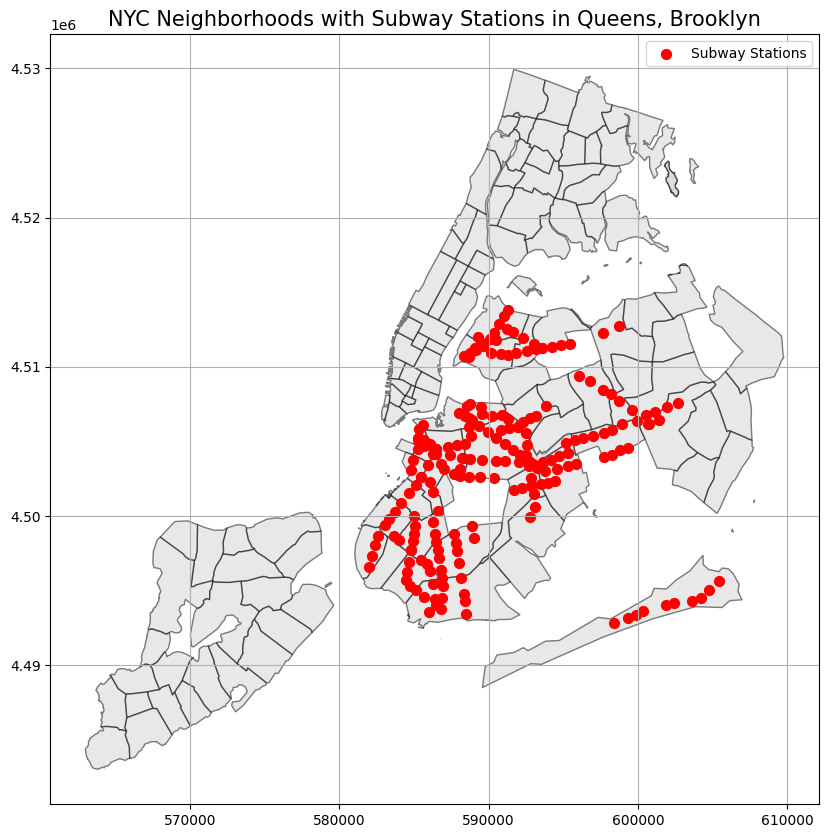

In [18]:
# Write and execute your SQL query
query = text("""SELECT nbh.NAME AS nbh_name, subways.NAME AS subway_name, subways.geom
FROM ch05.nyc_neighborhoods nbh, ch05.nyc_subway_stations subways  
WHERE ST_Intersects(nbh.geom, subways.geom) AND nbh.boroname in ('Queens' ,'Brooklyn')
                """)

all_nbg = text("SELECT * FROM ch05.nyc_neighborhoods")

sub_subway = gpd.read_postgis(query, con=engine)

all_neighbors = gpd.read_postgis(all_nbg, con = engine)

## Plot maps

ig, ax = plt.subplots(figsize=(12, 10))

all_neighbors.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label='Neighborhoods')

# Plot subway stations in red
sub_subway.plot(ax=ax, color='red', markersize=50, label='Subway Stations')

# Add title, legend, and grid
plt.title('NYC Neighborhoods with Subway Stations in Queens, Brooklyn', fontsize=15)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

